In [231]:
# opening necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
sb.set(context="paper", font="monospace")
import cPickle

In [232]:
# Reading in data
df = pd.read_csv('~/Desktop/no shows/No-show-Issue-Comma-300k.csv',date_parser=[2,3])
# https://www.kaggle.com/joniarroba/noshowappointments

In [233]:
# Looking at data
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


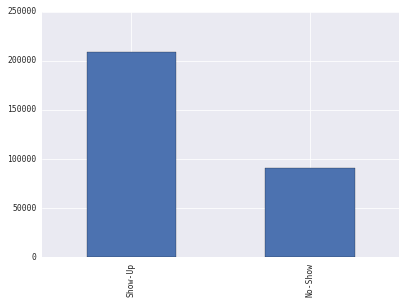

In [234]:
# getting an understanding of ratio of predictor variable
dataframe.Status.value_counts().plot(kind='bar')

In [235]:
# Cleaning outcome variable
d = {'Show-Up': 1, 'No-Show': 0}
outcome = df['Status'].map(d)

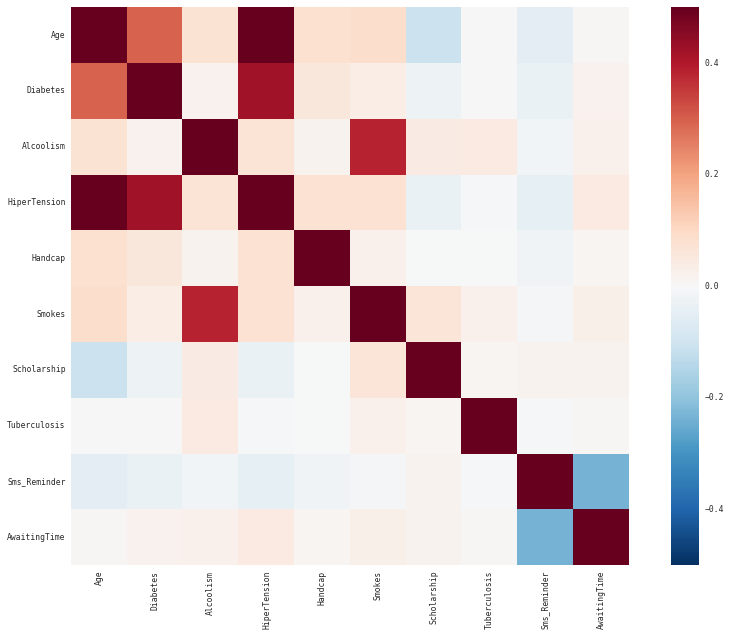

In [236]:
# Correlation Matrix.
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=0.5, square=True)
# Will drop Age from final model as it's highly correlated with a lot of the other variables 

In [225]:
df.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808040,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.808975,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [224]:
joined_df.head()

,Age,Gender,AppointmentRegistration,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,No-Show,Show-Up,AppointmentData,dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,19,M,2014-12-16 14:46:25,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,0.0,1.0,2015-01-14,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,F,2015-08-18 07:01:26,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,0.0,1.0,2015-08-19,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,F,2014-02-17 12:53:46,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,0.0,1.0,2014-02-18,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,M,2014-07-23 17:02:11,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,0.0,1.0,2014-08-07,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,38,M,2015-10-21 15:20:09,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,0.0,1.0,2015-10-27,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [218]:
df = df[(df.Age >= 0) & (df.Age <= 95)]

In [219]:
df['Status'] = df['Status'].astype('category')
joined_df = df.join(pd.get_dummies(df['Status']))

joined_df['AppointmentRegistration'] = pd.to_datetime(joined_df ['AppointmentRegistration'])
joined_df ['AppointmentData'] = pd.to_datetime(joined_df ['ApointmentData'])
joined_df  = joined_df .drop('ApointmentData', 1)

# add dayofweek as a number and as separate one-hot encodings
joined_df ['dayofweek'] = joined_df ['AppointmentData'].dt.dayofweek
joined_df  = joined_df .join(pd.get_dummies(joined_df ['DayOfTheWeek']))

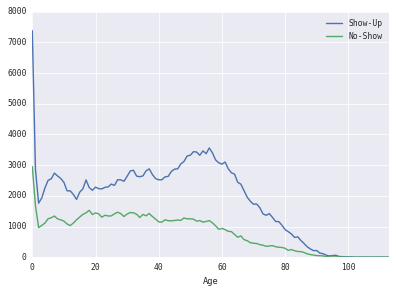

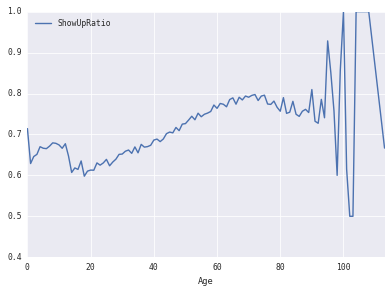

In [237]:
df2 = joined_df.groupby('Age').sum()
df2['ShowUpRatio'] = df2['Show-Up'] / (df2['Show-Up'] + df2['No-Show'])
df2[['Show-Up', 'No-Show']].plot()
df2[['ShowUpRatio']].plot()

In [238]:
def probStatus(dataset, group_by):
    df = df.crosstab(index = dataset[group_by], columns = dataset.Status).reset_index()
    df['probShowUp'] = df['Show-Up'] / (df['Show-Up'] + df['No-Show'])
    return df[[group_by, 'probShowUp']]

sb.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sb.plt.xlim(0, 100)
sb.plt.title('Probability of showing up with respect to Age')
sb.plt.show()

UnboundLocalError: local variable 'df' referenced before assignment

,Show-Up,No-Show,ShowUpRate
dayofweek,,,
0,40245.0,19053.0,0.678691
1,44626.0,18149.0,0.710888
2,44576.0,18919.0,0.702040
3,42412.0,17850.0,0.703793
4,36525.0,16246.0,0.692142
5,880.0,513.0,0.631730
6,5.0,1.0,0.833333


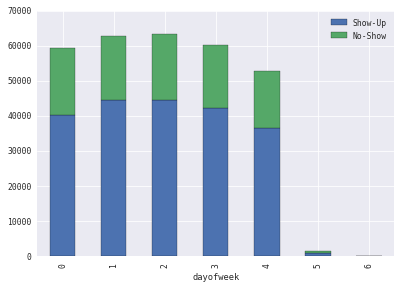

In [239]:
df2 = joined_df.groupby('dayofweek')['Show-Up','No-Show'].sum()
df2['ShowUpRate'] = df2['Show-Up'] / (df2['Show-Up'] + df2['No-Show'])
df2[['Show-Up','No-Show']].plot(kind='bar',stacked=True)
df2

In [240]:
df['apt_month'] = pd.DatetimeIndex(df['ApointmentData']).month
data = df.drop(['Status','AppointmentRegistration','ApointmentData'],axis=1,inplace=False)

In [241]:
data.head()

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,apt_month
0,19,M,Wednesday,0,0,0,0,0,0,0,0,-29,1
1,24,F,Wednesday,0,0,0,0,0,0,0,0,-1,8
2,4,F,Tuesday,0,0,0,0,0,0,0,0,-1,2
3,5,M,Thursday,0,0,0,0,0,0,0,1,-15,8
4,38,M,Tuesday,0,0,0,0,0,0,0,1,-6,10


In [243]:
#Change character variables to numeric in order to use in ML algorithms

def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:

            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(data)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (20 total features):
['Age', 'Gender_F', 'Gender_M', 'DayOfTheWeek_Friday', 'DayOfTheWeek_Monday', 'DayOfTheWeek_Saturday', 'DayOfTheWeek_Sunday', 'DayOfTheWeek_Thursday', 'DayOfTheWeek_Tuesday', 'DayOfTheWeek_Wednesday', 'Diabetes', 'Alcoolism', 'HiperTension', 'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder', 'AwaitingTime', 'apt_month']


In [244]:
X_all.head()
# dropping  Gender_M and Day of week Friday to reduce multicolinearity 
X_all.drop(["Gender_M","DayOfTheWeek_Friday"],axis=1,inplace=True)

In [245]:
# Training set represents 80% of the total set 
X_train, X_test, y_train, y_test= train_test_split(X_all, outcome, train_size=.8, random_state=40)

In [246]:
# Gradient Boost Model:

# Ensemble method that build a lot of dumpy models and combines then based on parameter tuning set sorta below. 
# Square root of max_features means the model can only use the squareroot of the total # of features in my dataset,
# The goal of the max_features is to reduce overfitting, which I suspect is happening here. 

parameters = [{'max_depth':[1,2,3,4]},{'n_estimators':[90,100,110]},{'learning_rate':[.09,.1,.12]},{'max_features':['sqrt']}]

# Initialize the classifier
clf_gb = GradientBoostingClassifier(random_state=42)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf_gb, parameters, scoring='roc_auc')

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf_gb = grid_obj.best_estimator_

clf_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.12, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)

In [247]:
# Printing out the vest scores from gridsearch
grid_obj.grid_scores_, grid_obj.best_params_, grid_obj.best_score_

([mean: 0.60119, std: 0.00113, params: {'max_depth': 1},
  mean: 0.60548, std: 0.00106, params: {'max_depth': 2},
  mean: 0.60676, std: 0.00111, params: {'max_depth': 3},
  mean: 0.60701, std: 0.00116, params: {'max_depth': 4},
  mean: 0.60659, std: 0.00105, params: {'n_estimators': 90},
  mean: 0.60676, std: 0.00111, params: {'n_estimators': 100},
  mean: 0.60687, std: 0.00118, params: {'n_estimators': 110},
  mean: 0.60666, std: 0.00105, params: {'learning_rate': 0.09},
  mean: 0.60676, std: 0.00111, params: {'learning_rate': 0.1},
  mean: 0.60707, std: 0.00115, params: {'learning_rate': 0.12},
  mean: 0.60604, std: 0.00118, params: {'max_features': 'sqrt'}],
 {'learning_rate': 0.12},
 0.6070719949012205)

In [248]:
# Logistic Regresion Model: 

parameters = [{'penalty':['l1','l2']},{'class_weight':['balanced',None]},{'C':[1.0,5.0,10.0,100.0]}]

# Initialize the classifier
clf_lg = LogisticRegression(random_state=42)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf_lg, parameters, scoring='roc_auc')

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf_lg = grid_obj.best_estimator_

clf_lg 

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [249]:
# reduce parameter space to speed up 
# Decision Tree
parameters = {'max_depth':list(range(1,11))}

# Initialize the classifier
clf_dt = DecisionTreeClassifier(random_state=42)

# Perform grDecisionTreeClassifierTreeClassifiersearch on the classifier
grid_obj = GridSearchCV(clf_dt, parameters, scoring='roc_auc')

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf_dt = grid_obj.best_estimator_

clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

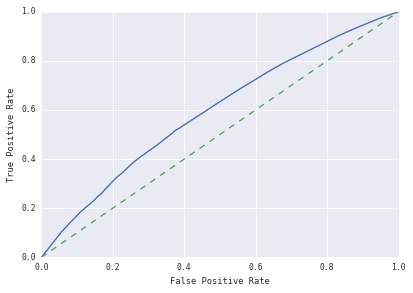

In [250]:
pred_probs = clf_dt.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

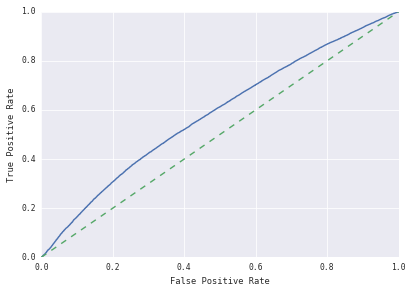

In [251]:
pred_probs = clf_lg.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

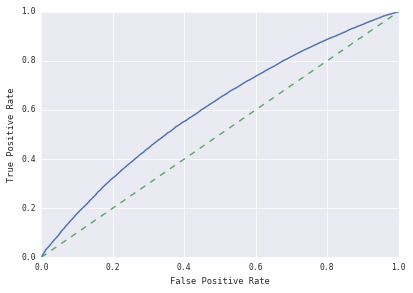

In [252]:
pred_probs = clf_gb.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [253]:
ss = StandardScaler()
dat_cont = ss.fit_transform(X_all)
dat_cont

array([[-0.82458838, -1.41958688, -0.49634103, ..., -1.14874884,
        -0.96624837, -1.6538648 ],
       [-0.60537644,  0.70443029, -0.49634103, ..., -1.14874884,
         0.81859272,  0.41938112],
       [-1.48222421,  0.70443029, -0.49634103, ..., -1.14874884,
         0.81859272, -1.35768681],
       ..., 
       [ 0.4468409 ,  0.70443029, -0.49634103, ..., -1.14874884,
         0.81859272,  0.12320313],
       [-1.43838182, -1.41958688, -0.49634103, ..., -1.14874884,
         0.4998711 , -0.46915284],
       [-1.65759377, -1.41958688, -0.49634103, ...,  0.8519516 ,
        -1.22122567,  0.12320313]])

In [254]:
dat_pca = PCA().fit(dat_cont)
print "Number of PCA components is: \n", dat_pca.n_components_
print "\n======\n"
print "List of PCA components is:\n", dat_pca.components_


Number of PCA components is: 
18


List of PCA components is:
[[  5.49928590e-01   5.72865568e-02  -1.96679904e-03   4.23046689e-02
    7.92349285e-04  -2.51996510e-02   4.14001320e-03   1.39722044e-02
    4.80944969e-01   1.81699101e-01   5.86895014e-01   1.36034662e-01
    2.00168065e-01  -7.18262729e-02   1.29884758e-02  -1.09259826e-01
    8.39354779e-02  -1.89094229e-03]
 [  1.03854184e-01   1.54216871e-01   4.46210193e-01  -8.06258268e-02
    7.34612917e-03  -3.39952717e-01   1.97784928e-01  -2.52098526e-01
    1.02499644e-01  -2.35968099e-01   9.48158219e-02  -8.48772641e-03
   -2.19565111e-01  -4.96122118e-02  -5.34248320e-02   5.15302044e-01
   -3.72140641e-01  -9.34589016e-02]
 [ -9.97719313e-02  -1.89347373e-01   2.45078180e-01  -3.79661370e-02
   -3.41917626e-03  -1.37149461e-01   6.09796599e-02  -1.47943430e-01
   -1.31081557e-01   6.12072853e-01  -1.05801001e-01   7.27447206e-03
    5.94832618e-01   1.59256379e-01   1.15322452e-01   2.07785870e-01
   -8.82084684e-02  -4.1

In [255]:
dat_pcs = dat_pca.transform(dat_cont)
dat_pcs

array([[-0.97031756, -0.98785664, -0.30007654, ...,  0.15465164,
        -0.19065649, -0.31101093],
       [-0.58219791, -1.49550647, -0.96842228, ..., -0.15982828,
        -0.13029509, -0.25799645],
       [-1.08506907, -0.31709347, -0.29439376, ..., -0.18287866,
        -0.6694645 , -0.30951381],
       ..., 
       [-0.28000542, -0.90909584, -0.1604523 , ..., -0.01921936,
         0.84163173,  0.96425188],
       [-1.2841428 , -1.93925622, -0.39792752, ...,  0.05856329,
        -0.44155586, -0.27441915],
       [-1.67176919, -0.11459811,  0.14679156, ...,  0.02330739,
        -0.60933446, -0.17587215]])

In [256]:
dat_pcs = pd.DataFrame(dat_pcs, columns=['PC'+str(i) for i in range(1, dat_pcs.shape[1]+1)])
dat_pcs['Status'] = outcome

In [257]:
dat_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Status
0,-0.970318,-0.987857,-0.300077,1.680183,-0.893038,0.631938,1.372544,1.061123,-0.010722,-0.179005,-0.401793,0.250995,-0.694042,1.564821,0.600226,0.154652,-0.190656,-0.311011,1
1,-0.582198,-1.495506,-0.968422,1.475252,-1.067982,-0.212507,-0.477466,-0.034816,0.008534,-0.028787,0.148407,-0.430668,0.639166,-0.192549,0.467178,-0.159828,-0.130295,-0.257996,1
2,-1.085069,-0.317093,-0.294394,-1.641423,-1.341225,0.073774,-0.610401,1.533277,-0.066343,-0.159134,-0.010608,-0.511936,0.598996,0.587174,1.217511,-0.182879,-0.669465,-0.309514,1
3,-1.552573,-0.777836,0.031169,-0.729457,1.470626,0.745866,1.213240,-0.398177,0.020284,0.023208,-0.189243,0.350394,-0.982850,-1.051310,-0.130623,0.007814,-0.386854,-0.154527,1
4,-0.636829,0.438287,0.303623,-1.446403,-1.405908,1.486795,-0.072129,-0.440299,0.037845,0.013124,0.021003,-0.149005,-0.640862,-0.794971,-0.801258,0.123708,0.463699,-0.151466,1


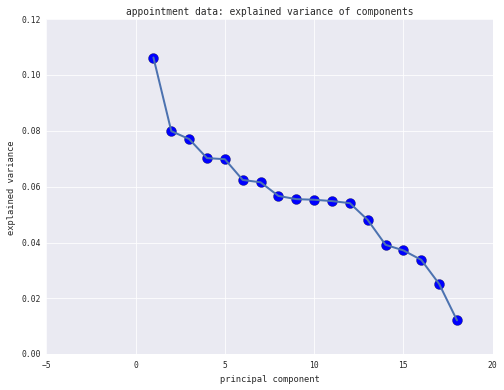

In [258]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, dat_cont.shape[1]+1), dat_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, dat_cont.shape[1]+1), dat_pca.explained_variance_ratio_, s=100)
ax.set_title('appointment data: explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [259]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [260]:
dat_pa = horn_parallel_analysis(dat_cont.shape, percentile=95)
dat_pa

array([ 1.01639919,  1.01351048,  1.01139994,  1.00951331,  1.00790743,
        1.00642816,  1.00502275,  1.00361578,  1.00215601,  1.00083362,
        0.99940021,  0.99813668,  0.99672655,  0.99521323,  0.9936594 ,
        0.99218538,  0.99033199,  0.98847093])

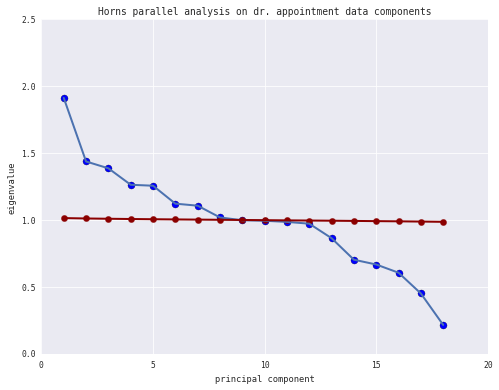

In [261]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, dat_cont.shape[1]+1), dat_pca.explained_variance_, lw=2)
ax.scatter(range(1, dat_cont.shape[1]+1), dat_pca.explained_variance_, s=50)

ax.plot(range(1, len(dat_pa)+1), dat_pa, lw=2, color='darkred')
ax.scatter(range(1, len(dat_pa)+1), dat_pa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on dr. appointment data components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

In [262]:
dat_pcs.head()
exclude_cols = dat_pcs.columns[15:]
exclude_cols

Index([u'PC16', u'PC17', u'PC18', u'Status'], dtype='object')

In [263]:

columns_ = dat_pcs.columns.tolist()
exclude_cols = dat_pcs.columns[15:]

ypc = dat_pcs.Status.values

Xpc = dat_pcs[[i for i in columns_ if i not in exclude_cols]]
Xpc = Xpc.values

In [264]:
# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA= train_test_split(Xpc, ypc, train_size=.2, random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train_PCA.shape[0])
print "Testing set has {} samples.".format(X_test_PCA.shape[0])

Training set has 60000 samples.
Testing set has 240000 samples.


In [265]:
# Gradient Boost Model:

# Ensemble method that build a lot of dumpy models and combines then based on parameter tuning set sorta below. 
# Square root of max_features means the model can only use the squareroot of the total # of features in my dataset,
# The goal of the max_features is to reduce overfitting, which I suspect is happening here. 

parameters = [{'max_depth':[1,2,3,4]},{'n_estimators':[90,100,110]},{'learning_rate':[.09,.1,.12]},{'max_features':['sqrt']}]

# Initialize the classifier
clf_gb = GradientBoostingClassifier(random_state=42)

# Perform grid search on the classifier
GB_gs_pc = GridSearchCV(clf_gb, parameters, scoring='roc_auc')

GB_gs_pc = GB_gs_pc.fit(X_train_PCA, y_train_PCA)

# Get the estimator
clf_pca_gb = GB_gs_pc.best_estimator_


In [266]:
clf_pca_gb.feature_importances_

array([ 0.11832916,  0.06599593,  0.1077365 ,  0.06080962,  0.03207597,
        0.04553079,  0.04032264,  0.07781764,  0.03969768,  0.04966067,
        0.03266563,  0.08072506,  0.04752105,  0.10189272,  0.09921895])

In [267]:
importances = clf_pca_gb.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(Xpc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.118329)
2. feature 2 (0.107736)
3. feature 13 (0.101893)
4. feature 14 (0.099219)
5. feature 11 (0.080725)
6. feature 7 (0.077818)
7. feature 1 (0.065996)
8. feature 3 (0.060810)
9. feature 9 (0.049661)
10. feature 12 (0.047521)
11. feature 5 (0.045531)
12. feature 6 (0.040323)
13. feature 8 (0.039698)
14. feature 10 (0.032666)
15. feature 4 (0.032076)


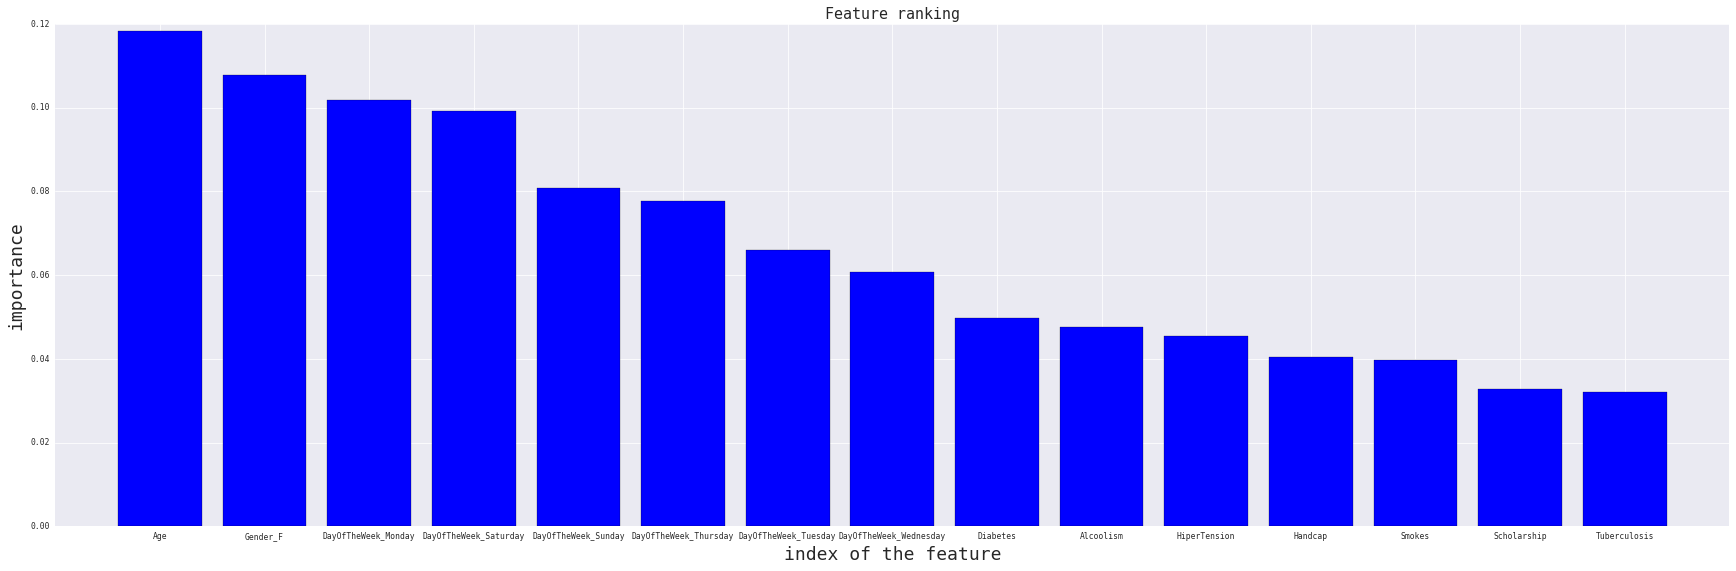

In [268]:
feature_names = X_all.columns

f, ax = plt.subplots(figsize=(30, 9))
plt.title("Feature ranking", fontsize = 15)
plt.bar(range(Xpc.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train_PCA.shape[1]), feature_names)
plt.xlim([-1, X_train_PCA.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [269]:
# Printing out the overall data and the bests
GB_gs_pc.grid_scores_, GB_gs_pc.best_params_, GB_gs_pc.best_score_

([mean: 0.58499, std: 0.00126, params: {'max_depth': 1},
  mean: 0.59101, std: 0.00089, params: {'max_depth': 2},
  mean: 0.59204, std: 0.00119, params: {'max_depth': 3},
  mean: 0.59094, std: 0.00072, params: {'max_depth': 4},
  mean: 0.59198, std: 0.00098, params: {'n_estimators': 90},
  mean: 0.59204, std: 0.00119, params: {'n_estimators': 100},
  mean: 0.59174, std: 0.00102, params: {'n_estimators': 110},
  mean: 0.59187, std: 0.00032, params: {'learning_rate': 0.09},
  mean: 0.59204, std: 0.00119, params: {'learning_rate': 0.1},
  mean: 0.59171, std: 0.00079, params: {'learning_rate': 0.12},
  mean: 0.59207, std: 0.00116, params: {'max_features': 'sqrt'}],
 {'max_features': 'sqrt'},
 0.5920701238030899)

In [270]:
# reduce parameter space to speed up 
# Decision Tree
# Create the parameters list you wish to tune
parameters = {'max_depth':list(range(1,11))}

# Initialize the classifier
clf_dt_PCA = DecisionTreeClassifier(random_state=42)

# Perform grDecisionTreeClassifierTreeClassifiersearch on the classifier
grid_obj = GridSearchCV(clf_dt_PCA, parameters, scoring='roc_auc')

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train_PCA, y_train_PCA)

# Get the estimator
clf_dt_pc = grid_obj.best_estimator_

clf_dt_pc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [271]:
importances_DT = clf_dt_pc.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(Xpc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.118329)
2. feature 2 (0.107736)
3. feature 13 (0.101893)
4. feature 14 (0.099219)
5. feature 11 (0.080725)
6. feature 7 (0.077818)
7. feature 1 (0.065996)
8. feature 3 (0.060810)
9. feature 9 (0.049661)
10. feature 12 (0.047521)
11. feature 5 (0.045531)
12. feature 6 (0.040323)
13. feature 8 (0.039698)
14. feature 10 (0.032666)
15. feature 4 (0.032076)


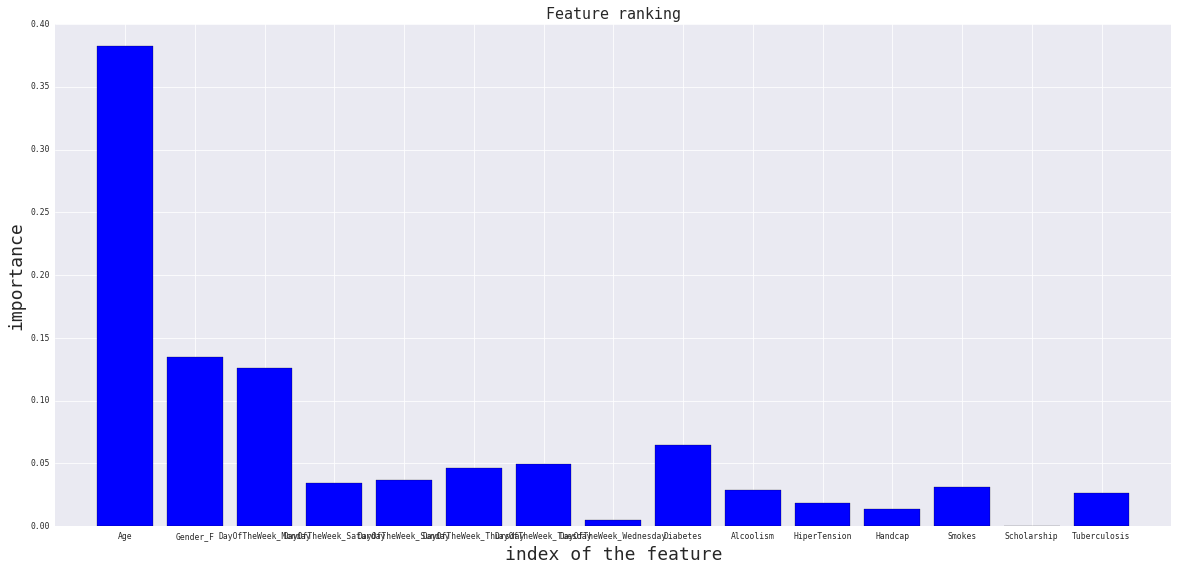

In [272]:
feature_names = X_all.columns

f, ax = plt.subplots(figsize=(20, 9))
plt.title("Feature ranking", fontsize = 15)
plt.bar(range(Xpc.shape[1]), importances_DT[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train_PCA.shape[1]), feature_names)
plt.xlim([-1, X_train_PCA.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [273]:
# Logistic Regresion Model: 

parameters = [{'penalty':['l1','l2']},{'class_weight':['balanced',None]},{'C':[1.0,5.0,10.0,100.0]}]

# Initialize the classifier
clf_lg_pc = LogisticRegression(random_state=42)

# Perform grid search on the classifier
grid_obj = GridSearchCV(clf_lg_pc, parameters, scoring='roc_auc')

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train_PCA, y_train_PCA)

# Get the estimator
clf_lg_pc = grid_obj.best_estimator_

clf_lg_pc

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

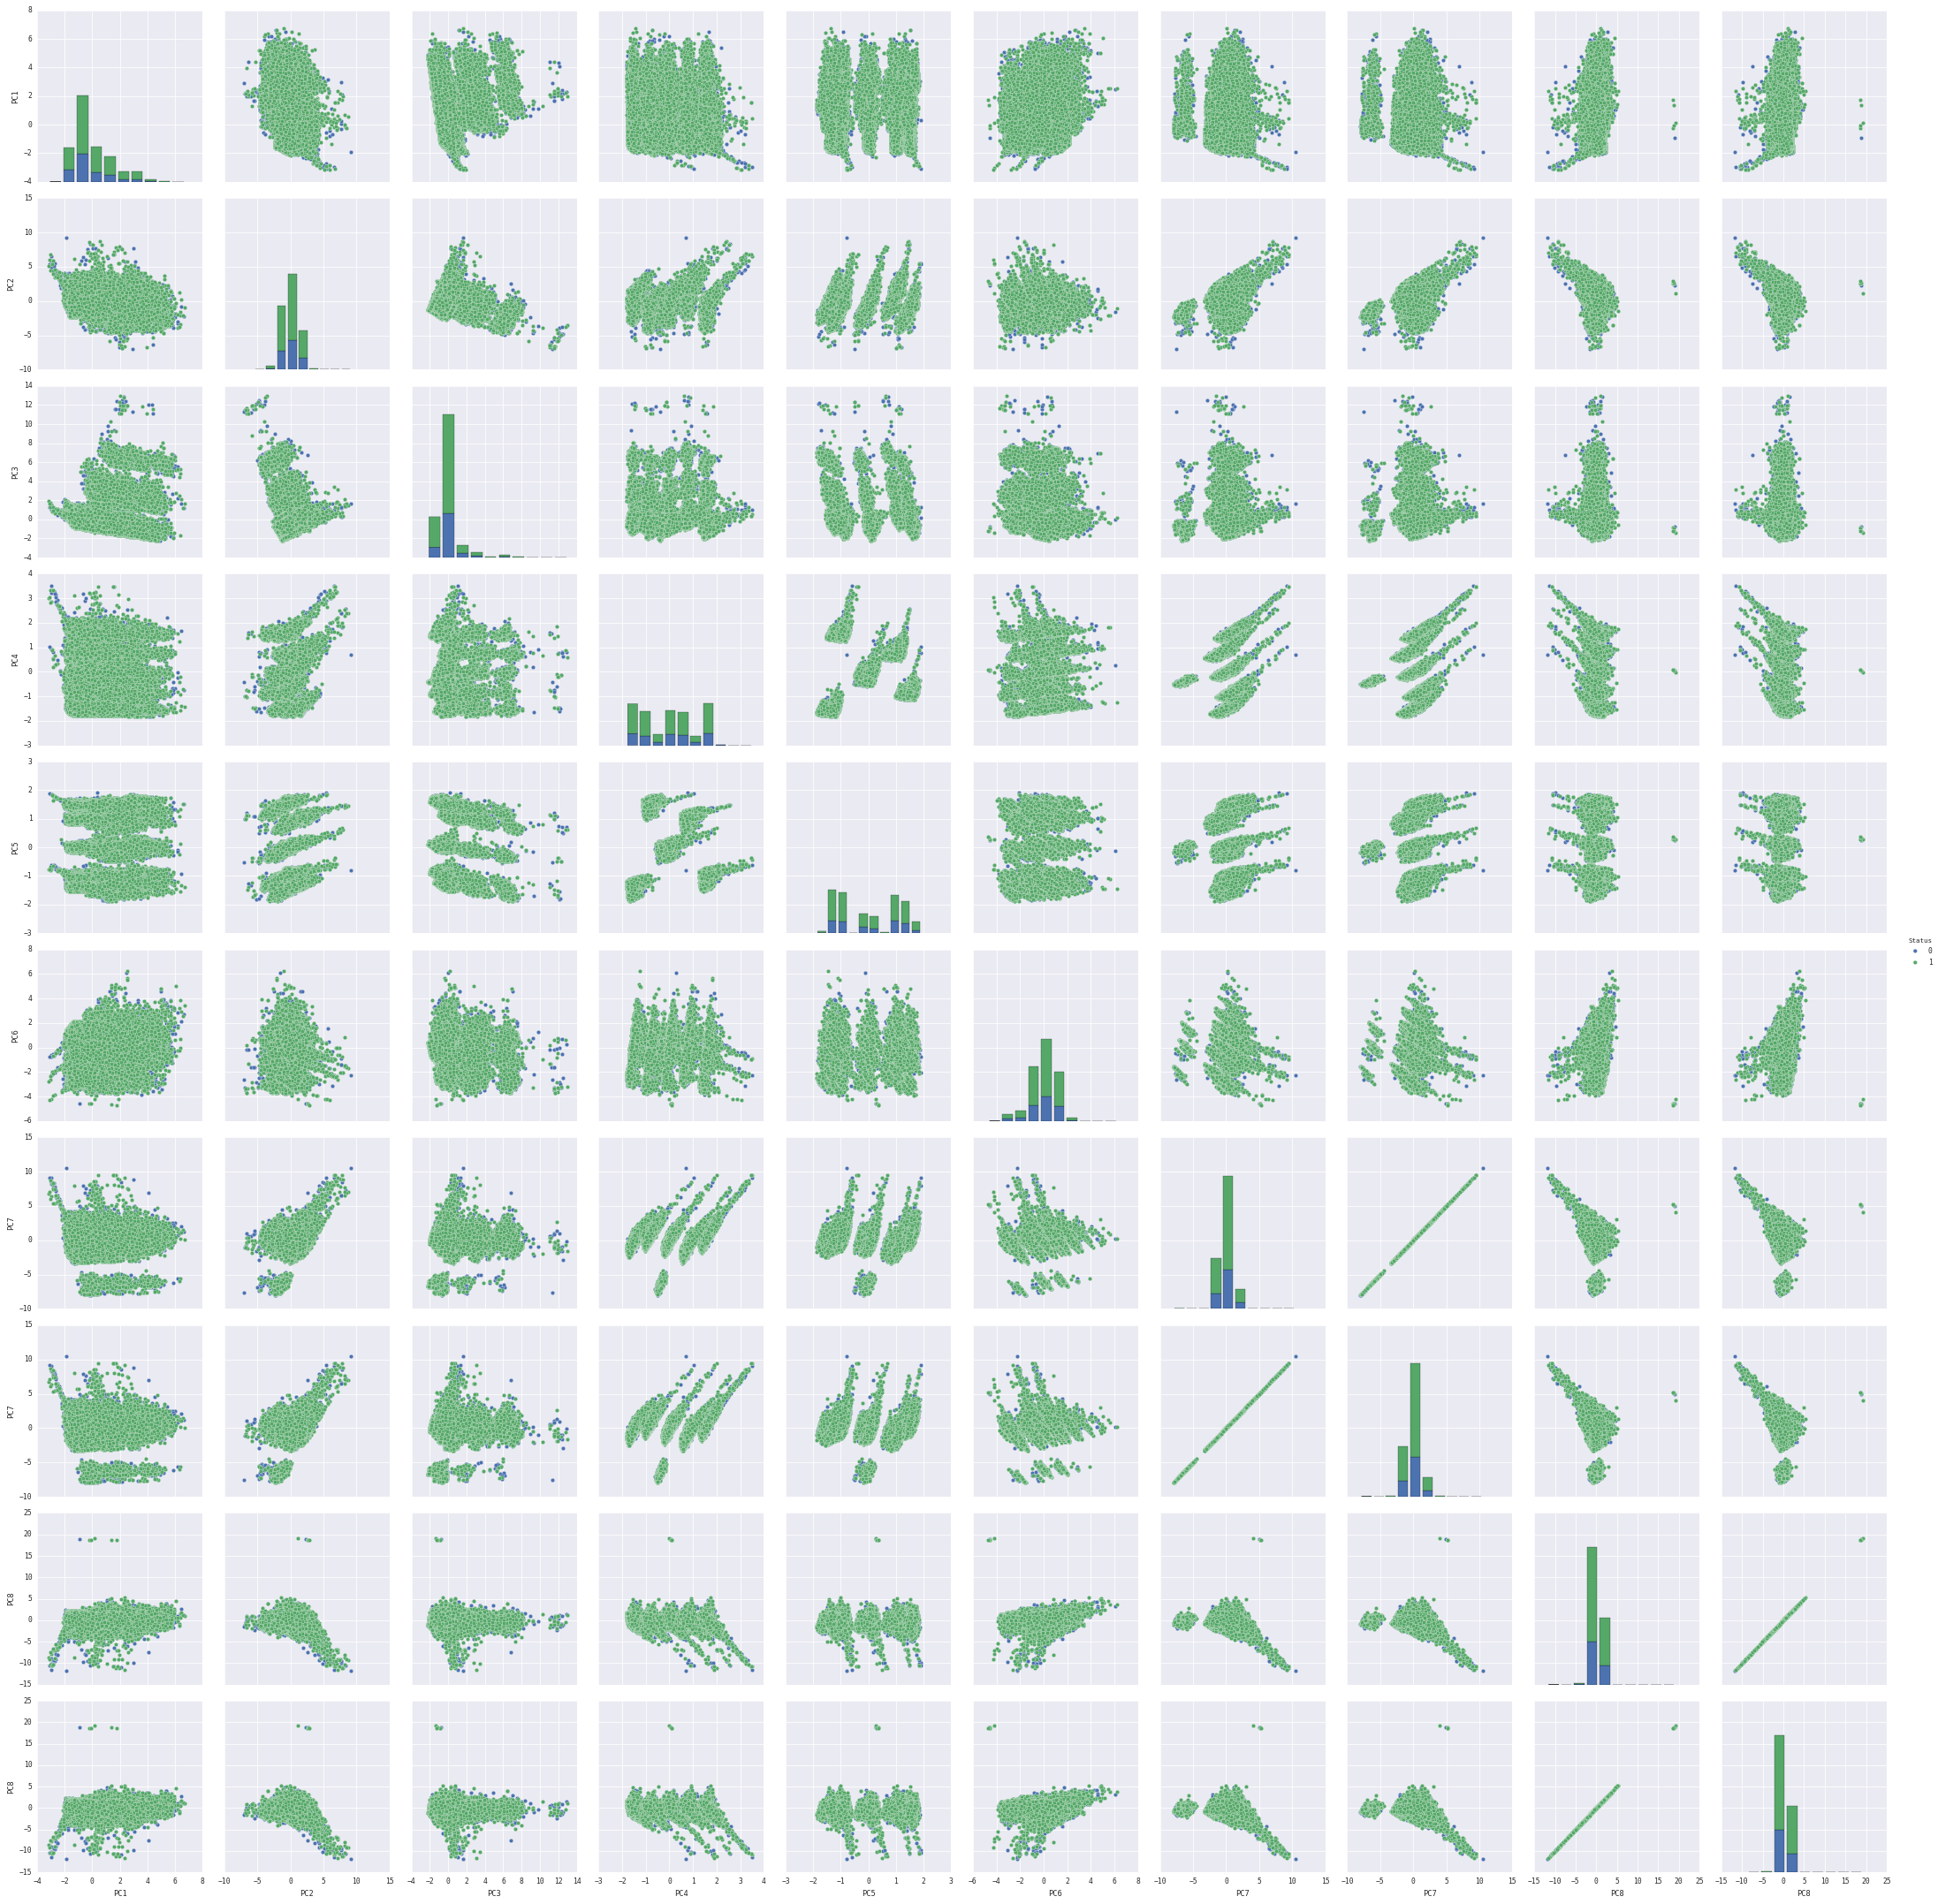

In [274]:
sb.pairplot(data=dat_pcs, vars=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC8','PC8'], hue='Status', size=3)
plt.show()

In [275]:
cv_indices_pc = StratifiedKFold(ypc, n_folds=5)

lr_scores_test_pc = []
lr_scores_train_pc = []

GB_scores_test_pc = []
GB_scores_train_pc = []

DT_scores_test_pc = []
DT_scores_train_pc = []

for train_inds, test_inds in cv_indices_pc:    
    Xtr_pc, ytr_pc = Xpc[train_inds, :], ypc[train_inds]
    Xte_pc, yte_pc = Xpc[test_inds, :], ypc[test_inds]
    print 'Xtrain and ytrain shapes:\n', Xtr_pc.shape, ytr_pc.shape
    print 'Xtest and ytest shapes:\n', Xte_pc.shape, yte_pc.shape

    clf_pca_gb.fit(Xtr_pc, ytr_pc)
    GB_scores_test_pc.append(clf_pca_gb.score(Xte_pc, yte_pc))
    GB_scores_train_pc.append(clf_pca_gb.score(Xtr_pc, ytr_pc))
    '''best_gb.score = Returns the mean accuracy on the given test data and labels'''
    y_gb_predict_pc= clf_pca_gb.predict(Xte_pc)

    clf_lg_pc.fit(Xtr_pc, ytr_pc)
    lr_scores_test_pc.append(clf_lg_pc.score(Xte_pc, yte_pc))
    lr_scores_train_pc.append(clf_lg_pc.score(Xtr_pc, ytr_pc))
    '''logreg.score = Returns the mean accuracy on the given test data and labels'''
    y_log_predict_pc= clf_lg_pc.predict(Xte_pc)

    clf_dt_pc.fit(Xtr_pc, ytr_pc)
    DT_scores_test_pc.append(clf_dt_pc.score(Xte_pc, yte_pc))
    DT_scores_train_pc.append(clf_dt_pc.score(Xtr_pc, ytr_pc))
    '''DT.score = Returns the mean accuracy on the given test data and labels'''
    y_dt_predict_pc= clf_dt_pc.predict(Xte_pc)

print "\n======\n"
print 'GradientBOOST accuracy scores on test:\n', GB_scores_test_pc
print 'GradientBOOST mean of accuracy scores on test:\n', np.mean(GB_scores_test_pc)
print 'GradientBOOST mean of accuracy scores on train :\n', np.mean(GB_scores_train_pc)
print "\n======\n"
print 'Logistic Regression accuracy scores on test:\n', lr_scores_test_pc
print 'Logistic Regression mean of accuracy scores on test:\n', np.mean(lr_scores_test_pc)
print 'Logistic Regression mean of accuracy scores on train:\n', np.mean(lr_scores_train_pc)
print "\n======\n"
print 'Decision Tree accuracy scores on test:\n', DT_scores_test_pc
print 'Decision Tree mean of accuracy scores on test:\n', np.mean(DT_scores_test_pc)
print 'Decision Tree mean of accuracy scores on train:\n', np.mean(DT_scores_train_pc)
print "\n======\n"
print 'Baseline accuracy:\n ', np.mean(ypc) ## the average of the outcome variable    

Xtrain and ytrain shapes:
(239999, 15) (239999,)
Xtest and ytest shapes:
(60001, 15) (60001,)
Xtrain and ytrain shapes:
(240000, 15) (240000,)
Xtest and ytest shapes:
(60000, 15) (60000,)
Xtrain and ytrain shapes:
(240000, 15) (240000,)
Xtest and ytest shapes:
(60000, 15) (60000,)
Xtrain and ytrain shapes:
(240000, 15) (240000,)
Xtest and ytest shapes:
(60000, 15) (60000,)
Xtrain and ytrain shapes:
(240001, 15) (240001,)
Xtest and ytest shapes:
(59999, 15) (59999,)


GradientBOOST accuracy scores on test:
[0.69753837436042732, 0.69761666666666666, 0.69771666666666665, 0.69769999999999999, 0.69739495658260975]
GradientBOOST mean of accuracy scores on test:
0.697593332855
GradientBOOST mean of accuracy scores on train :
0.697930833352


Logistic Regression accuracy scores on test:
[0.55100748320861315, 0.5526833333333333, 0.55145, 0.55456666666666665, 0.55194253237553959]
Logistic Regression mean of accuracy scores on test:
0.552330003117
Logistic Regression mean of accuracy scores on tr

In [276]:
GB_scores_test = []
clf_gb.fit(X_test,y_test)
y_gb_predict= clf_gb.predict(X_test)

In [277]:
'''the mean of the accuracy score on the test data has a significant increase from '''
print 'Gradient Boost mean of accuracy scores on test PC:\n', np.mean(GB_scores_test_pc)
print "Increase of accuracy of:", (np.mean(GB_scores_test_pc) - np.mean(clf_gb.score(X_test,y_test)))
print 'Logistic Regression mean of accuracy scores on test PC:\n', np.mean(lr_scores_test_pc)
print "Increase of accuracy of:", (np.mean(GB_scores_test_pc) - np.mean(clf_lg.score(X_test,y_test)))
print 'Decision Tree Regression mean of accuracy scores on test PC:\n', np.mean(DT_scores_test_pc)
print "Increase of accuracy of:", (np.mean(GB_scores_test_pc) - np.mean(clf_dt.score(X_test,y_test)))

Gradient Boost mean of accuracy scores on test PC:
0.697593332855
Increase of accuracy of: -0.00254000047806
Logistic Regression mean of accuracy scores on test PC:
0.552330003117
Increase of accuracy of: 0.141759999522
Decision Tree Regression mean of accuracy scores on test PC:
0.697236671133
Increase of accuracy of: -0.000406667144726


In [278]:
print outcome.value_counts()
print dat_pcs.Status.value_counts()

1    209269
0     90731
Name: Status, dtype: int64
1    209269
0     90731
Name: Status, dtype: int64


In [279]:
def confus_mat(ytrue, ypred_method, what_predict):
    what_predict = str(what_predict)
    confmat = confusion_matrix(y_true=ytrue, y_pred=ypred_method)
    confusion = pd.DataFrame(confmat, index=['is_not_' + what_predict, 'is_' + what_predict],
                         columns=['predicted_is_not_'+ what_predict, 'predicted_is_'+what_predict])
    return confusion

In [280]:
def class_report(ytrue, ypred):
    cls_rep = classification_report(yte, y_knn_predict)
    print cls_rep

In [281]:
confus_mat(yte_pc, y_log_predict_pc, 'Status') 

,predicted_is_not_Status,predicted_is_Status
is_not_Status,10704,7442
is_Status,19441,22412


In [282]:
confus_mat(yte_pc, y_gb_predict_pc, 'Status') 

,predicted_is_not_Status,predicted_is_Status
is_not_Status,30,18116
is_Status,40,41813


In [283]:
#Save a model
# with open('gradient_boos_PCA_Model.pkl', 'wb') as fid:
#     cPickle.dump(clf_pca_gb, fid)

with open('gradient_boost_Model.pkl', 'wb') as fid:
    cPickle.dump(clf_gb, fid)    
# #Load model
with open('gradient_boost_Model.pkl','rb') as fid: #model.pkl == file name in current workspace
    model_load = cPickle.load(fid) #model_load = Pickled model loaded to workspace

In [190]:
model_load

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)

In [191]:
y_gb_predict= model_load.predict(X_test)

In [195]:
confus_mat(y_test, y_gb_predict, 'Status') 

,predicted_is_not_Status,predicted_is_Status
is_not_Status,87,17993
is_Status,33,41887


In [196]:
GB_scores_test_pc

[0.69743837602706626,
 0.69766666666666666,
 0.69748333333333334,
 0.69764999999999999,
 0.69777829630493837]

In [197]:
y_gb_predict

array([1, 1, 1, ..., 1, 1, 1])

In [200]:
X_test['Predicted_Status'] = y_gb_predict

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [202]:
X_test['Actual_Status'] = y_test

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [203]:
X_test.head()

,Gender_F,DayOfTheWeek_Monday,DayOfTheWeek_Saturday,DayOfTheWeek_Sunday,DayOfTheWeek_Thursday,DayOfTheWeek_Tuesday,DayOfTheWeek_Wednesday,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,apt_month,Predicted_Status,Actual_Status
290476,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,0,1,1,0,1,-6,1,1,1
10795,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,1,-20,6,1,1
26789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,-3,8,1,1
214485,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,-4,6,1,1
18376,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,-9,1,1,1


In [204]:
GB_scores_tes_LOADED

[]